# Веб

Структура занятия:

1) Введение

2) WSGI, ASGI

3) flask

4) fastapi

5) aiohttp

6) разработка приложения


Веб-разработка в широком смысле подразумевает создание и обслуживание сайтов / сервисов / API.

Составные части веб-приложений:
- клиентская часть - реализует пользовательский интерфес и запросы к серверу, включает
    - создание дружелюбного и производительного пользовательского интерфейса
    - AJAX
    - кросс-поатформенную совместимость
    - версионирование и развёртывание
- серверная часть - выполняет вычисления, формирует ответ, отправляет ответ по сети
    - доступ к данным
    - бизнес-логику
    - управление БД
    - масштабируемость
    - обеспечение высокой доступности
    - аспекты ИБ (инфобез)
    - бэкапирование 
    - преобразование данных (ETL)
    - архитектура
    - версионирование и развёртывание

В этом занятии будем рассматривать только сервеную часть на минималках, так как изучение всех аспеков построения веб-приложений требует очень большого погружения 

Для ускорения разработки бекенда используются web-фреймворки: наборы пакетов и модулей с готовыми компонентами приложения.

Самые известные веб-фреймворки для Python:
- Django - очень мощный и сложный фрейморк, включающий огромное количество полезных функций. Сам по себе синхронный, есть возможность через `sync_to_async` сделать выполнение условно асинхронным
- Flask - микрофреймворк, простой в использовании, полностью синхронный до версии 2.2, псевдоасинхронный после
- Fastapi - легковесный, простой асинхронный фреймворк
- Aiohttp - не совсем фреймворк, а просто асинхронные клиент и сервер

Установим необходимые для занятия зависимости

In [16]:
# pip install flask

In [17]:
# pip install uvicorn

In [18]:
# pip install fastapi

In [19]:
# pip install aiohttp

## WSGI, ASGI

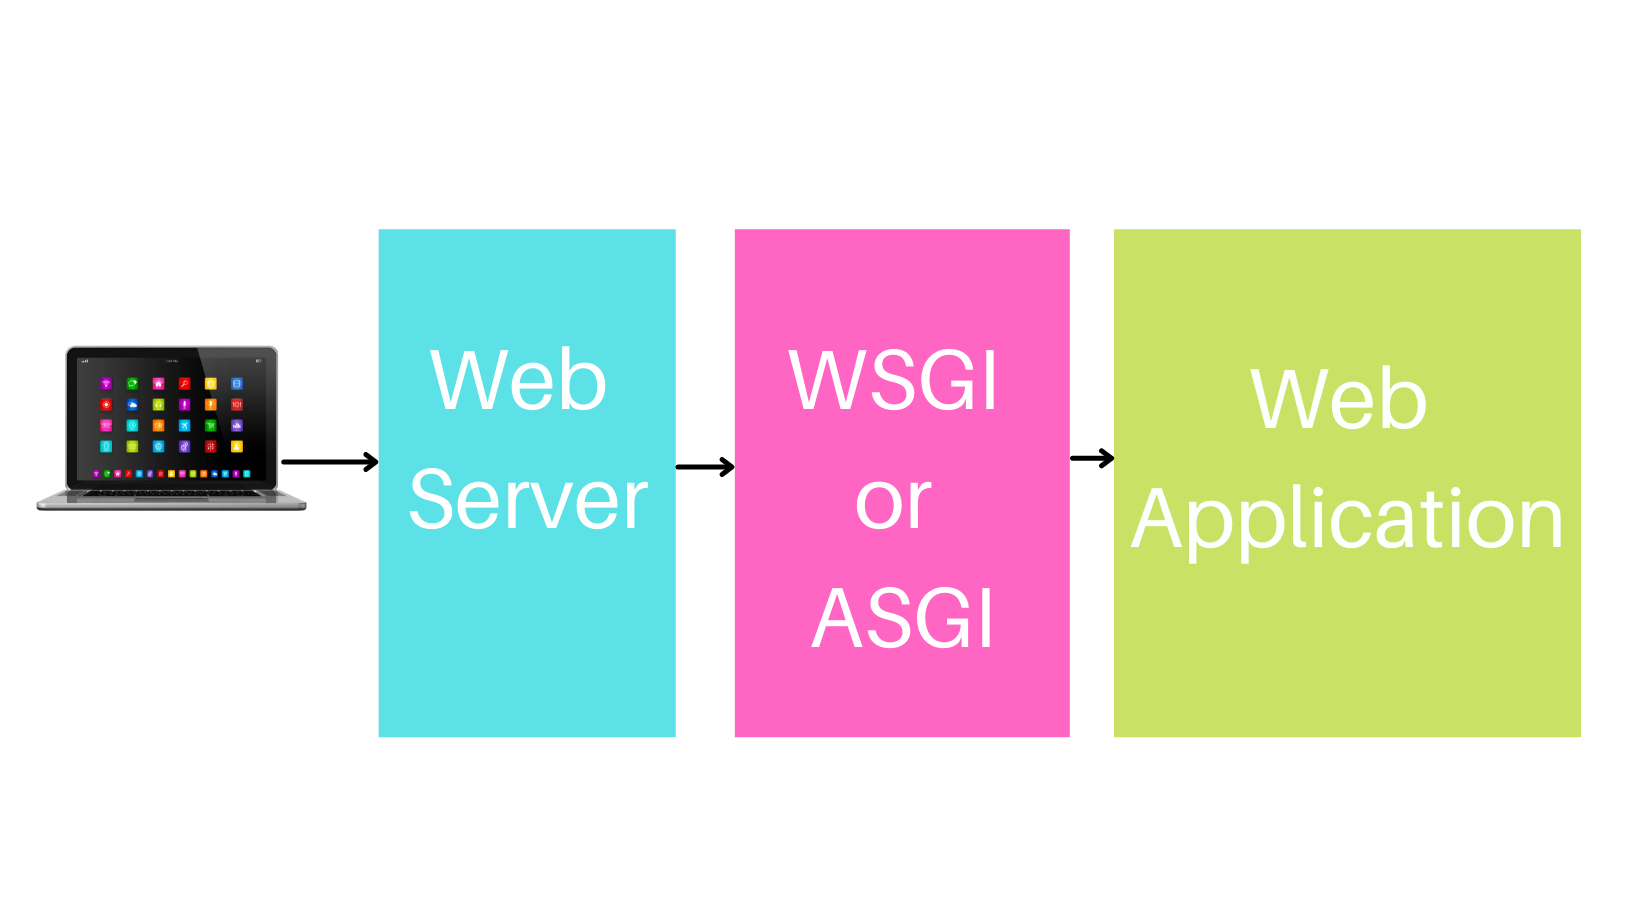

WSGI (англ. Web Server Gateway Interface) — стандарт взаимодействия между Python-программой, выполняющейся на стороне сервера, и самим веб-сервером. WSGI предоставляет простой и универсальный интерфейс между большинством веб-серверов и веб-приложениями или фреймворками. Пример WSGI сервера - `Apache`. Примеры фреймворков - `Django`, `Flask`, `CherryPy`, `Pyramid`

По стандарту, WSGI-приложение должно удовлетворять следующим требованиям:
- должно быть вызываемым объектом (обычно это функция или метод)
- принимать два параметра:
    - словарь переменных окружения
    - обработчик запроса
- вызывать обработчик запроса с кодом HTTP-ответа и HTTP-заголовками
- возвращать итерируемый объект с телом ответа

ASGI (англ. Asynchronous Server Gateway Interface) — клиент-серверный протокол взаимодействия веб-сервера и приложения, дальнейшее развитие технологии WSGI. По сравнению с WSGI предоставляет стандарт как для асинхронных, так и для синхронных приложений, с реализацией обратной совместимости WSGI и несколькими серверами и платформами приложений. Примеры ASGI серверов - `uvicorn`, `hypercorn`, `Daphne`. Примеры фреймворков - `Fastapi`, `Starlette`, `Quart`, `Falcon`

ASGI предоставляет доступ к функциям, которые невозможно реализовать средствами WSGI:
- WebSocket
- server-sent Events
- HTTP/2

## Flask

https://flask.palletsprojects.com/en/2.3.x/

Flask построен на Werkzeug WSGI сервере. Имеет поддержку псевдоасинхронного выполнения - запрос может быть запушен в Цикле событий (только asyncio) внутри отдельного потока.

In [15]:
%%file flask_sample_1.py
from flask import Flask

app = Flask(__name__)

@app.route("/")  # регистрируем ручку (handler)
def hello():
    return "Hello World!"

if __name__ == "__main__":  
    app.run(host='0.0.0.0', port=8001)  # localhost:8001

Overwriting flask_sample_1.py


## Fastapi

https://fastapi.tiangolo.com/

Fastapi имеет полную поддерку ASGI, может быть запущен на любом ASGI сервере, например uvicorn, hypercorn, Daphne

In [12]:
%%file fastapi_sample_1.py
from typing import Union

import uvicorn
from fastapi import FastAPI

app = FastAPI()


@app.get("/")  # регистрируем ручку (handler)
async def read_root():
    return {"Hello": "World"}


@app.get("/items/{item_id}")  # регистрируем ручку (handler)
async def read_item(item_id: int, q: Union[str, None] = None):
    return {"item_id": item_id, "q": q}

if __name__ == "__main__":  
    uvicorn.run(app, host="0.0.0.0", port=8002)  # localhost:8002

Overwriting fastapi_sample_1.py


## Aiohttp

https://docs.aiohttp.org/en/stable/

Aiohttp имеет собственную реализацию асинхронного сервера, не поддерживает стандарт ASGI. 

Каждая ручка (handler) должна быть корутиной, принимающей на вход запрос `Request` и возращающей ответ `Response`

In [23]:
%%file aiohttp_sample_1.py
from aiohttp import web

routes = web.RouteTableDef()

@routes.get('/')  # ручка '/', метод - GET
async def hello(request):
    return web.Response(text="{\"Hello\": \"world\"}", headers={'Content-Type': 'application/json'})

app = web.Application()
app.add_routes(routes)  # регистрируем обработчики (ручки) 
web.run_app(app, host="0.0.0.0", port=8003)  # localhost:8003

Overwriting aiohttp_sample_1.py


## Разработка высоконагруженного веб-приложения

Шаг 1. Анализ и сбор требований
- описываются функциональные требования, то есть то что должно делать приложение. Например, для сервиса типа Твиттера:
    - публикация сообщения
    - подписаться / отписаться от другого пользователя
    - прочитать отдельное сообщение
    - прочитать ленту из сообщений подписок
    - добавить лайк
    - добавить комментарий
    - удалить сообщение
- описываются сценарии использования от бизнеса, например:
    - примерные метрики активности (DAU/MAU)
    - система должна быть масштабируемой
    - каждый пользователь с среднем пишет 1 сообщение в день, читает 10 сообщений
    - система должны быть региональной / глобальной
    - в системе будут звёзды (популярные пользователи)

Шаг 2. Высокоуровневая архитектура
- База данных
    - вид СУБД, нагрузка и объём
    - шардирование и реплицирование, решардинг
    - кеширование
    - очереди
    - распределённая БД
- Архитектура
    - несколько ДЦ + Global server load balancing
    - L7 балансировщик + SSL терминирование
    - монолит / микросервисы (нужно знать достоинства этих подходов) + декомпозиция на микросервисы
    - способ разворачивания сервисов (Server, VM, Docker, Kubernetes)
- Метрики или оценка состояния системы
    - ресурсы: CPU, Memory, Network RX/TX, 
    - число активных реплик
    - активные соединения, RPM
    - ErrorRate

Шаг 3. Реализация
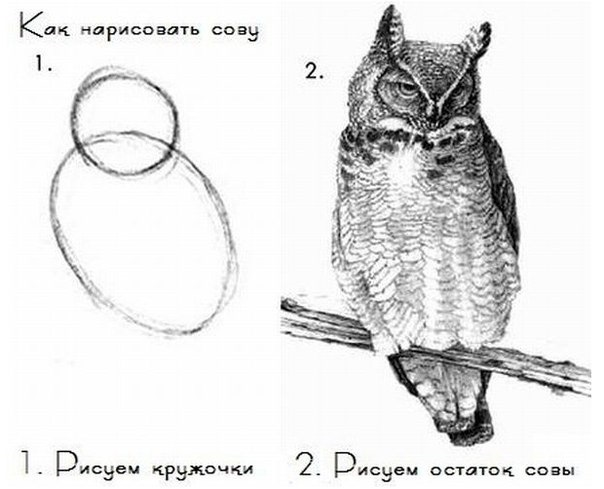
- Зависит от архитектуры, например, решили выделить 4 сервиса (доменные области):
    - сервис Пользователей
    - сервис Сообщений
    - сервис Социальный граф
    - сервис Поиска
    - сервис Комментариев
- Разрабатываем интерфейс сервисов (контракты взаимодействия). Сервисы могут взаимодействовать между собой:
    - с помощью API - синхронного или асинхронного
    - с помощью шины данных (databus) и событий
- Пишем бизнес-логику каждого сервиса, учитываем сложные технические вопросы
    - используем очереди для асинхронного взаимодействия компонентов  внутри 1 сервиса
    - кешируем частые запросы
    - решаем проблемы распределённых систем, как-то гонки и взаимоблокировки

Шаг 4. Тестирование
- Автоматическое тестирование
- AB тестирование (тестирование продуктовых изменений)
- Канареечные деплои (тестирование логических изменений)

Шаг 5. Развёртывание

Шаг 6. Сопровождение и документирование